# Machine Learning Project Code

#### Import useful packages

In [171]:
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Read in and clean data

In [172]:
df = pd.read_csv('C:\\Users\\johnb\\OneDrive\\Documents\\MSA\\Fall 3\\Machine Learning\\MLProjectData.csv')

In [173]:
df.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
0,1424.241,15.70,-1.930008,-0.005399,-0.014426,-0.017944,0.011322,15.22,13.77,13.96,...,False,True,False,False,False,False,False,False,False,21.639999
1,983.787,15.59,0.190003,-0.000129,0.002850,0.017414,0.033371,15.15,15.54,16.64,...,False,False,False,False,False,False,False,False,False,19.919998
2,105.075,16.32,0.809998,0.000752,0.004340,0.025135,0.007954,16.23,16.71,17.44,...,False,False,False,False,False,False,False,False,False,21.150001
3,356.126,28.29,-1.409996,-0.011557,-0.020185,0.003352,-0.047518,26.66,26.24,28.18,...,False,False,False,False,False,False,False,False,False,19.360001
4,772.041,11.49,0.079987,0.001576,0.000724,0.025519,0.033136,11.76,11.97,10.74,...,False,False,False,False,False,False,False,False,False,21.400009


In [174]:
# See if any of the category have more than two levels
for col in df.columns:
    if col[0:3] == 'cat':
        print(df[col].value_counts())

B    1303
C    1303
D    1279
E    1271
A    1194
Name: cat1, dtype: int64
F    557
H    554
E    550
J    550
C    547
L    529
G    529
D    527
K    510
A    509
I    508
B    480
Name: cat2, dtype: int64
False    6131
True      219
Name: cat3, dtype: int64
False    6070
True      280
Name: cat4, dtype: int64
False    6099
True      251
Name: cat5, dtype: int64
False    6156
True      194
Name: cat6, dtype: int64
False    6192
True      158
Name: cat7, dtype: int64
False    6281
True       69
Name: cat8, dtype: int64
False    6322
True       28
Name: cat9, dtype: int64
False    6306
True       44
Name: cat10, dtype: int64
False    6131
True      219
Name: cat11, dtype: int64
False    6070
True      280
Name: cat12, dtype: int64
False    6099
True      251
Name: cat13, dtype: int64
False    6156
True      194
Name: cat14, dtype: int64
False    6306
True       44
Name: cat15, dtype: int64
False    6322
True       28
Name: cat16, dtype: int64
False    6192
True      158
Name: cat17, dt

In [175]:
# Create dummies for cat1 variable
dummies1 = pd.get_dummies(df['cat1'], prefix='cat1')
dummies1.head()

,cat1_A,cat1_B,cat1_C,cat1_D,cat1_E
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1


In [176]:
# Create dummies for cat2 variable
dummies2 = pd.get_dummies(df['cat2'], prefix='cat2')
dummies2.head()

,cat2_A,cat2_B,cat2_C,cat2_D,cat2_E,cat2_F,cat2_G,cat2_H,cat2_I,cat2_J,cat2_K,cat2_L
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0


In [177]:
# Join the data with the dummies and drop the original columns
df_final = df.join(dummies1).join(dummies2)
df_final.drop(['cat1','cat2'], axis=1, inplace=True)

In [178]:
df_final.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat2_C,cat2_D,cat2_E,cat2_F,cat2_G,cat2_H,cat2_I,cat2_J,cat2_K,cat2_L
0,1424.241,15.70,-1.930008,-0.005399,-0.014426,-0.017944,0.011322,15.22,13.77,13.96,...,0,1,0,0,0,0,0,0,0,0
1,983.787,15.59,0.190003,-0.000129,0.002850,0.017414,0.033371,15.15,15.54,16.64,...,0,0,0,0,1,0,0,0,0,0
2,105.075,16.32,0.809998,0.000752,0.004340,0.025135,0.007954,16.23,16.71,17.44,...,0,0,0,0,0,0,0,0,1,0
3,356.126,28.29,-1.409996,-0.011557,-0.020185,0.003352,-0.047518,26.66,26.24,28.18,...,0,0,0,0,0,0,0,0,0,1
4,772.041,11.49,0.079987,0.001576,0.000724,0.025519,0.033136,11.76,11.97,10.74,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Create the variable and target subsets
var = df_final.drop('target',axis=1)
target = df_final['target']

#### Basic OLS Linear Model

In [191]:
# Import the necessary packages
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, train_test_split

In [192]:
# Performe a train-test split and calculate the baseline MAE
var_train, var_test, target_train, target_test = train_test_split(var, target, test_size=0.3, random_state=69)
baseline = [target_train.mean()] * len(target_test)
base_score = mean_absolute_error(target_test, baseline)
base_score

0.9602879158667785

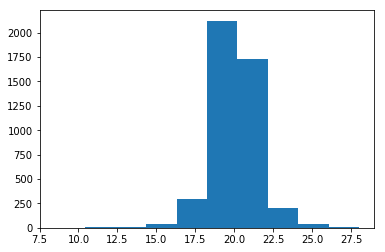

In [193]:
plt.hist(target_train);

In [194]:
# Initialize and fit the basic linear model
reg = linear_model.LinearRegression()
reg.fit(var_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
# R-squared
reg.score(var_test, target_test)

-0.0017441789738017466

In [196]:
# Predict on the test set
preds = reg.predict(var_test)
OLS_mae = mean_absolute_error(target_test, preds)
# Difference between baseline and OLS
base_score - OLS_mae

-0.006227093595627897

#### Reguarlized Regression (LASSO)

In [197]:
# Initialize and fit the reguarlized regression model
lasso = linear_model.Lasso()
lasso.fit(var_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [198]:
# Get predictions and score
lasso_preds = lasso.predict(var_test)
lasso_mae = mean_absolute_error(target_test, lasso_preds)
base_score - lasso_mae

0.000613759129573177

#### Ridge

In [199]:
# Now let us see how ridge does
ridge = linear_model.Ridge()
ridge.fit(var_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [200]:
ridge_preds = ridge.predict(var_test)
ridge_mae = mean_absolute_error(target_test, ridge_preds)
base_score - ridge_mae

-0.006661489761288553

#### Elastic Net

In [156]:
# Now let's grid search over elastic net
# so that we get the optimal ratio
en = linear_model.ElasticNet(max_iter=5000, random_state=69)
param_grid = {'l1_ratio':np.arange(0,1.1,0.1)}

In [157]:
# Set up the grid search
en_grid = GridSearchCV(en, param_grid, scoring='neg_mean_absolute_error', n_jobs=6, cv=5)
en_grid.fit(var, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=69, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [158]:
# Output the results to a dataframe
en_df = pd.DataFrame(en_grid.cv_results_)

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\util

In [159]:
en_df[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,{'l1_ratio': 0.0},-0.959481,-0.953606
1,{'l1_ratio': 0.1},-0.957484,-0.954409
2,{'l1_ratio': 0.2},-0.956560,-0.954610
3,{'l1_ratio': 0.30000000000000004},-0.956371,-0.954849
4,{'l1_ratio': 0.4},-0.956375,-0.954952
5,{'l1_ratio': 0.5},-0.956402,-0.955020
6,{'l1_ratio': 0.6000000000000001},-0.956384,-0.955083
7,{'l1_ratio': 0.7000000000000001},-0.956337,-0.955160
8,{'l1_ratio': 0.8},-0.956304,-0.955251
9,{'l1_ratio': 0.9},-0.956276,-0.955321


In [160]:
# Examine the best result
en_df[en_df['mean_test_score'] == en_df['mean_test_score'].max()][['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
10,{'l1_ratio': 1.0},-0.956257,-0.955376


The above was our best result so we decided to go with this model!

In [215]:
test_data = pd.read_csv('C:\\Users\\johnb\\OneDrive\\Documents\\MSA\\Fall 3\\Machine Learning\\testData.csv')

In [216]:
test_data.head()

,Unnamed: 0,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26
0,6403,569.259,14.97,0.539978,0.008158,0.004598,0.007786,-0.020163,16.14,15.60,...,False,False,False,False,False,False,False,False,False,False
1,6404,664.937,13.37,1.750000,0.008458,0.016685,0.014065,-0.006170,14.97,16.14,...,False,False,False,False,False,False,False,False,False,False
2,6405,505.504,12.69,3.790009,0.009004,0.017539,0.031743,0.004845,13.37,14.97,...,False,False,False,False,False,False,False,False,False,False
3,6406,519.668,12.64,1.579987,0.003598,0.012635,0.029569,0.012341,12.69,13.37,...,False,False,False,False,False,False,False,False,False,False
4,6407,770.547,13.63,-1.559998,-0.007314,-0.003742,0.020569,0.003225,12.64,12.69,...,False,False,False,False,False,False,False,False,False,False


In [217]:
test_data_row = test_data['Unnamed: 0']
test_data_var = test_data.drop('Unnamed: 0', axis=1)

In [219]:
test_data_var.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26
0,569.259,14.97,0.539978,0.008158,0.004598,0.007786,-0.020163,16.14,15.60,16.09,...,False,False,False,False,False,False,False,False,False,False
1,664.937,13.37,1.750000,0.008458,0.016685,0.014065,-0.006170,14.97,16.14,15.60,...,False,False,False,False,False,False,False,False,False,False
2,505.504,12.69,3.790009,0.009004,0.017539,0.031743,0.004845,13.37,14.97,16.14,...,False,False,False,False,False,False,False,False,False,False
3,519.668,12.64,1.579987,0.003598,0.012635,0.029569,0.012341,12.69,13.37,14.97,...,False,False,False,False,False,False,False,False,False,False
4,770.547,13.63,-1.559998,-0.007314,-0.003742,0.020569,0.003225,12.64,12.69,13.37,...,False,False,False,False,False,False,False,False,False,False


In [220]:
dummies1_test = pd.get_dummies(test_data_var['cat1'], prefix='cat1')
dummies2_test = pd.get_dummies(test_data_var['cat2'], prefix='cat2')

In [221]:
test_final = test_data_var.join(dummies1_test).join(dummies2_test)
test_final.drop(['cat1','cat2'], axis=1, inplace=True)

In [222]:
test_final.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat26,cat1_A,cat1_B,cat1_C,cat1_D,cat1_E,cat2_G,cat2_H,cat2_I,cat2_J
0,569.259,14.97,0.539978,0.008158,0.004598,0.007786,-0.020163,16.14,15.60,16.09,...,False,0,0,0,1,0,1,0,0,0
1,664.937,13.37,1.750000,0.008458,0.016685,0.014065,-0.006170,14.97,16.14,15.60,...,False,0,0,0,0,1,1,0,0,0
2,505.504,12.69,3.790009,0.009004,0.017539,0.031743,0.004845,13.37,14.97,16.14,...,False,1,0,0,0,0,1,0,0,0
3,519.668,12.64,1.579987,0.003598,0.012635,0.029569,0.012341,12.69,13.37,14.97,...,False,0,1,0,0,0,1,0,0,0
4,770.547,13.63,-1.559998,-0.007314,-0.003742,0.020569,0.003225,12.64,12.69,13.37,...,False,0,0,1,0,0,1,0,0,0


In [223]:
for col in var.columns:
    if col not in test_final.columns:
        test_final[col] = 0

In [224]:
test_final.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat2_I,cat2_J,cat2_A,cat2_B,cat2_C,cat2_D,cat2_E,cat2_F,cat2_K,cat2_L
0,569.259,14.97,0.539978,0.008158,0.004598,0.007786,-0.020163,16.14,15.60,16.09,...,0,0,0,0,0,0,0,0,0,0
1,664.937,13.37,1.750000,0.008458,0.016685,0.014065,-0.006170,14.97,16.14,15.60,...,0,0,0,0,0,0,0,0,0,0
2,505.504,12.69,3.790009,0.009004,0.017539,0.031743,0.004845,13.37,14.97,16.14,...,0,0,0,0,0,0,0,0,0,0
3,519.668,12.64,1.579987,0.003598,0.012635,0.029569,0.012341,12.69,13.37,14.97,...,0,0,0,0,0,0,0,0,0,0
4,770.547,13.63,-1.559998,-0.007314,-0.003742,0.020569,0.003225,12.64,12.69,13.37,...,0,0,0,0,0,0,0,0,0,0


In [225]:
final_model = linear_model.ElasticNet(max_iter=5000, l1_ratio=1, random_state=69)

In [226]:
final_model.fit(var, target)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=69, selection='cyclic', tol=0.0001, warm_start=False)

In [227]:
final_preds = final_model.predict(test_final)

In [242]:
final_pred_df = pd.DataFrame(final_preds).reset_index()

In [243]:
final_pred_df.head()

,index,0
0,0,20.083064
1,1,20.074197
2,2,20.047319
3,3,20.038862
4,4,20.049601


In [244]:
final_pred_df.columns = ['Row','Prediction']

In [245]:
final_pred_df.head()

,Row,Prediction
0,0,20.083064
1,1,20.074197
2,2,20.047319
3,3,20.038862
4,4,20.049601


In [248]:
final_pred_df['Row'] = final_pred_df['Row'] + 1

In [250]:
final_pred_df.head()

,Row,Prediction
0,1,20.083064
1,2,20.074197
2,3,20.047319
3,4,20.038862
4,5,20.049601


In [251]:
len(final_pred_df)

77

In [252]:
final_pred_df.to_csv('C:\\Users\\johnb\\OneDrive\\Documents\\MSA\\Fall 3\\Machine Learning\\Orange3.csv')

#### Decision Trees

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Initialize and use cross-validation to score
tree = DecisionTreeRegressor()
cv = cross_validate(tree, var, target, scoring='neg_mean_absolute_error', return_train_score=True, cv=5)

In [20]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [21]:
cv['test_score']

array([-1.468004  , -1.41615268, -1.41121311, -1.46245574, -1.38853182])

In [22]:
cv['train_score']

array([-4.25590551e-07, -7.58038058e-07, -7.39304462e-07, -4.58825459e-07,
       -3.84383202e-07])

In [23]:
# Set up the parameters for grid search
tree_params = {'max_depth': [i+1 for i in range(10)], 'min_samples_split' :[2,5,10,20], 'min_samples_leaf':[1,2,5,8,10,20,30,40]}
grid = GridSearchCV(tree, param_grid=tree_params,scoring='neg_mean_absolute_error', cv=5)
grid.fit(var, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 5, 8, 10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [127]:
# Score off the best model
grid_df = pd.DataFrame(grid.cv_results_)
base_score - (-1 * grid_df['mean_test_score'].max())

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\util

0.005318568231099108

In [128]:
grid_df[grid_df['mean_test_score']==grid_df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
46,0.09057,0.003052,0.007169,0.00074,2,8,10,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",-0.95312,-0.963466,...,-0.954969,0.013405,1,-0.950908,-0.948507,-0.956669,-0.947486,-0.950721,-0.950858,0.003184


#### Random Forests

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
# Set up and fit random forest
start = timeit.default_timer()
test_forest = RandomForestRegressor(n_estimators=500, n_jobs=6, random_state=69)
test_forest.fit(var_train, target_train)
stop = timeit.default_timer()

print('time: ',stop-start)

time:  62.301276814585435


In [92]:
# Get predictions and score
test_forest_preds = test_forest.predict(var_test)
test_forest_mae = mean_absolute_error(target_test, test_forest_preds)
base_score - test_forest_mae

-0.018224755261102565

In [69]:
# Also run with cross-validation
start = timeit.default_timer()
cv_forest = cross_validate(test_forest, var, target, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], return_train_score=True, cv=5)
stop = timeit.default_timer()

print('time: ',stop-start)

time:  369.8960190282014


In [77]:
print(cv_forest['train_neg_mean_absolute_error'])
print(cv_forest['train_neg_mean_squared_error'])

[-0.36292071 -0.36276081 -0.36489346 -0.36403172 -0.364787  ]
[-0.29044786 -0.29130447 -0.29886637 -0.29534025 -0.30701109]


In [78]:
print(cv_forest['test_neg_mean_absolute_error'])
print(cv_forest['test_neg_mean_squared_error'])

[-0.98300467 -0.98199264 -0.95950743 -0.99118755 -0.98190623]
[-2.18072445 -2.23154712 -1.9485578  -2.2361245  -1.95170937]


In [93]:
# Set up forest for grid search
forest = RandomForestRegressor(random_state=69)
forest_params = {'n_estimators':[10,100,1000], 'max_features':['auto','log2',10]}

In [97]:
forest_search = GridSearchCV(forest, param_grid=forest_params, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], cv=5, n_jobs=6, refit='neg_mean_absolute_error')

In [98]:
# Fit the model

### WARNING ###
## This takes like 15 minutes ##

start = timeit.default_timer()
forest_search.fit(var, target)
stop = timeit.default_timer()

print('time: ', stop-start)

time:  903.3776962496559


In [99]:
rand_df = pd.DataFrame(forest_search.cv_results_)

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C

In [102]:
# Get the best score
base_score - (-1 * rand_df['mean_test_neg_mean_absolute_error'].max())

-0.009982061413150611

In [104]:
rand_df[rand_df['mean_test_neg_mean_absolute_error'] == rand_df['mean_test_neg_mean_absolute_error'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,...,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error
5,53.939423,1.07597,5.885934,0.261703,log2,1000,"{'max_features': 'log2', 'n_estimators': 1000}",-0.980622,-0.967729,-0.952132,...,-2.067634,0.119914,1,-0.276363,-0.277391,-0.287194,-0.277478,-0.287935,-0.281272,0.005158


#### Feature Engineering with FeatureTools

In [14]:
import featuretools as ft

In [15]:
# Set up the entities
es = ft.EntitySet(id='data')
es = es.entity_from_dataframe(entity_id='data',
                             dataframe=var, 
                              index='index',
                             make_index=True)

In [111]:
es['data'].variables

[<Variable: index (dtype = index)>,
 <Variable: num1 (dtype = numeric)>,
 <Variable: num2 (dtype = numeric)>,
 <Variable: num3 (dtype = numeric)>,
 <Variable: num4 (dtype = numeric)>,
 <Variable: num5 (dtype = numeric)>,
 <Variable: num6 (dtype = numeric)>,
 <Variable: num7 (dtype = numeric)>,
 <Variable: num8 (dtype = numeric)>,
 <Variable: num9 (dtype = numeric)>,
 <Variable: num10 (dtype = numeric)>,
 <Variable: num11 (dtype = numeric)>,
 <Variable: num12 (dtype = numeric)>,
 <Variable: num13 (dtype = numeric)>,
 <Variable: num14 (dtype = numeric)>,
 <Variable: num15 (dtype = numeric)>,
 <Variable: num16 (dtype = numeric)>,
 <Variable: num17 (dtype = numeric)>,
 <Variable: num18 (dtype = numeric)>,
 <Variable: num19 (dtype = numeric)>,
 <Variable: num20 (dtype = numeric)>,
 <Variable: num21 (dtype = numeric)>,
 <Variable: num22 (dtype = numeric)>,
 <Variable: num23 (dtype = numeric)>,
 <Variable: num24 (dtype = numeric)>,
 <Variable: num25 (dtype = numeric)>,
 <Variable: num26 (dtyp

In [132]:
ft.list_primitives()

,name,type,description
0,num_true,aggregation,Finds the number of 'True' values in a boolean.
1,count,aggregation,Counts the number of non null values.
2,avg_time_between,aggregation,Computes the average time between consecutive ...
3,time_since_last,aggregation,Time since last related instance.
4,skew,aggregation,Computes the skewness of a data set.
5,mode,aggregation,Finds the most common element in a categorical...
6,mean,aggregation,Computes the average value of a numeric feature.
7,num_unique,aggregation,Returns the number of unique categorical varia...
8,max,aggregation,Finds the maximum non-null value of a numeric ...
9,trend,aggregation,Calculates the slope of the linear trend of va...


In [16]:
# Create the features using transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                     target_entity='data',
                                     trans_primitives=['multiply','add',
                                                      'subtract'],
                                     n_jobs=6,
                                     max_depth=1)

EntitySet scattered to workers in 4.075 seconds


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\Users\johnb\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:57395 remote=tcp://127.0.0.1:57330>


In [47]:
len(feature_defs)

11500

In [48]:
feature_matrix.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,num22 - num50,num27 - num24,num29 - cat1_C,num21 - num16,cat2_L - num1,num12 - cat2_J,cat2_F - num8,cat1_C - cat2_D,num39 - num53,num6 - num8
index,,,,,,,,,,,,,,,,,,,,,
0,1424.241,15.70,-1.930008,-0.005399,-0.014426,-0.017944,0.011322,15.22,13.77,13.96,...,115.629465,-8.854600,58.836975,-1.249988,-1424.241,0.031537,-15.22,255,49.605040,-15.237944
1,983.787,15.59,0.190003,-0.000129,0.002850,0.017414,0.033371,15.15,15.54,16.64,...,-113.504117,-31.733729,61.478762,0.229997,-983.787,0.029043,-15.15,0,27.626613,-15.132586
2,105.075,16.32,0.809998,0.000752,0.004340,0.025135,0.007954,16.23,16.71,17.44,...,20.019640,-30.229271,48.888235,-0.610004,-105.075,0.005545,-16.23,0,17.826410,-16.204865
3,356.126,28.29,-1.409996,-0.011557,-0.020185,0.003352,-0.047518,26.66,26.24,28.18,...,57.637477,-38.815950,37.987422,-2.949999,-355.126,0.061140,-26.66,1,28.791835,-26.656648
4,772.041,11.49,0.079987,0.001576,0.000724,0.025519,0.033136,11.76,11.97,10.74,...,50.890634,-26.785792,77.661471,0.510003,-772.041,-0.022959,-11.76,0,29.890500,-11.734481


In [49]:
# Run a random forest with all the new features

### WARNING ###
## This also takes a while ##

start = timeit.default_timer()
eng_forest = RandomForestRegressor(n_estimators=1000, n_jobs=6, max_features='log2', random_state=69)
cv_eng_forest = cross_validate(eng_forest, feature_matrix, target, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], return_train_score=True, cv=5)
stop = timeit.default_timer()

print('time: ',stop-start)

time:  752.5145476308046


In [50]:
#Get the best scores
print(base_score)
print(cv_eng_forest['test_neg_mean_absolute_error'])
print(cv_eng_forest['test_neg_mean_squared_error'])

0.9602879158667785
[-0.98092445 -0.97044855 -0.95605318 -0.97716734 -0.96985617]
[-2.21397017 -2.14677232 -1.94055349 -2.17917173 -1.91123632]


#### XGBoost

In [61]:
import xgboost as xg

In [62]:
# Split the feature matrix into training and test
ft_train, ft_test, lab_train, lab_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=69)

NameError: name 'feature_matrix' is not defined

In [63]:
# Set up data in proper form for XGBoost
dtrain = xg.DMatrix(var_train, label=target_train)
dtest = xg.DMatrix(var_test, label=target_test)

#fttrain = xg.DMatrix(ft_train, label=lab_train)
#fttest = xg.DMatrix(ft_test, label=lab_test)

In [64]:
# Set up the parameters for XGBoost model
xg_param = {'max_depth':3,'nthread':6,'silent':1,'objective':'reg:linear'}
xg_param['eval_metric'] = 'mae'
evallist = [(dtrain, 'train'),(dtest, 'eval')]
#ftevallist = [(fttrain, 'train'),(fttest,'eval')]

In [66]:
# Run model on original variables
num_round = 100
bst = xg.train(xg_param, dtrain, num_round, evallist, early_stopping_rounds=50)

[0]	train-mae:13.6986	eval-mae:13.5937
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 50 rounds.
[1]	train-mae:9.59086	eval-mae:9.4856
[2]	train-mae:6.71978	eval-mae:6.61379
[3]	train-mae:4.71698	eval-mae:4.61891
[4]	train-mae:3.33493	eval-mae:3.24593
[5]	train-mae:2.40733	eval-mae:2.34393
[6]	train-mae:1.8091	eval-mae:1.77012
[7]	train-mae:1.4373	eval-mae:1.42513
[8]	train-mae:1.21362	eval-mae:1.22362
[9]	train-mae:1.08034	eval-mae:1.10837
[10]	train-mae:1.00564	eval-mae:1.04084
[11]	train-mae:0.961942	eval-mae:1.00336
[12]	train-mae:0.936595	eval-mae:0.983398
[13]	train-mae:0.920036	eval-mae:0.976162
[14]	train-mae:0.910682	eval-mae:0.971434
[15]	train-mae:0.904132	eval-mae:0.969761
[16]	train-mae:0.898466	eval-mae:0.972156
[17]	train-mae:0.894102	eval-mae:0.969855
[18]	train-mae:0.892687	eval-mae:0.969927
[19]	train-mae:0.890171	eval-mae:0.970159
[20]	train-mae:0.888305	eval-mae:0.970488
[21]	train-ma

In [34]:
# Run model on all new variables
#ftbst = xg.train(xg_param, fttrain, num_round, ftevallist, early_stopping_rounds=10)

[0]	train-mae:13.6989	eval-mae:13.5929
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 10 rounds.
[1]	train-mae:9.59066	eval-mae:9.4833
[2]	train-mae:6.71582	eval-mae:6.61375
[3]	train-mae:4.71308	eval-mae:4.6175
[4]	train-mae:3.33203	eval-mae:3.2485
[5]	train-mae:2.40287	eval-mae:2.34645
[6]	train-mae:1.80759	eval-mae:1.77214
[7]	train-mae:1.43494	eval-mae:1.42519
[8]	train-mae:1.20912	eval-mae:1.22178
[9]	train-mae:1.07773	eval-mae:1.10076
[10]	train-mae:1.0039	eval-mae:1.03401
[11]	train-mae:0.962453	eval-mae:0.998721
[12]	train-mae:0.939167	eval-mae:0.980303
[13]	train-mae:0.926497	eval-mae:0.970994
[14]	train-mae:0.918274	eval-mae:0.968065
[15]	train-mae:0.911569	eval-mae:0.969079
[16]	train-mae:0.90788	eval-mae:0.968331
[17]	train-mae:0.904295	eval-mae:0.968882
[18]	train-mae:0.900551	eval-mae:0.968958
[19]	train-mae:0.89863	eval-mae:0.968938
[20]	train-mae:0.895318	eval-mae:0.969214
[21]	train-mae:

In [26]:
xg_preds = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

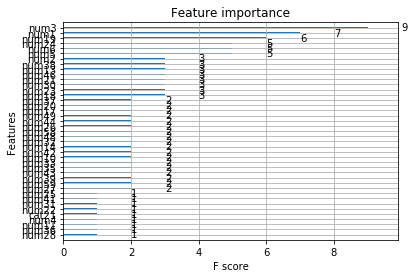

In [27]:
xg.plot_importance(bst);

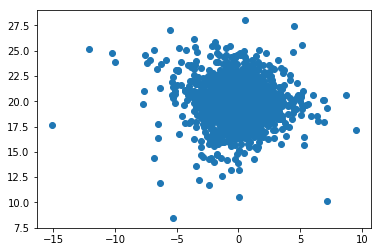

In [40]:
plt.scatter(var_train['num3'],target_train)

#### Principal Component Regression

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [18]:
# Grab just the numeric columns
nums = [col for col in df_final.columns if col[0:3] == 'num']
num_train = var_train[nums]
num_test = var_test[nums]

In [82]:
# Fit and transform the scaled numeric variables
pca = PCA(n_components=20).fit_transform(scale(num_train))

C:\Users\johnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


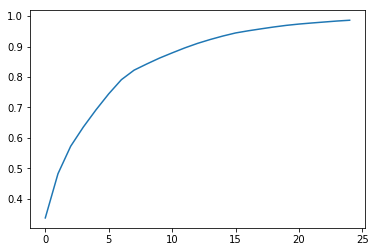

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [89]:
# Send the components through a linear model
pca_reg = linear_model.LinearRegression()
pca_score = cross_validate(pca_reg, pca, target_train, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], return_train_score=True, cv=5)


In [90]:
print(pca_score['test_neg_mean_absolute_error'])
print(pca_score['test_neg_mean_squared_error'])

[-1.00581836 -0.97985907 -0.89378028 -0.93595191 -0.97842187]
[-2.42612447 -2.15790599 -1.67023449 -1.78273828 -2.01951272]


#### Regularized Regression with New Features

In [19]:
# Add squared numeric variables
new_var = var
for col in var.columns:
    if col[0:3] == 'num':
        new_var[col + '_squared'] = (var[col] ** 2)
        new_var[col] = var[col]

In [20]:
# Separate the numeric and categorical variables
numeric = []
cat = []
for col in var.columns:
    if col[0:3] == 'num':
        numeric.append(col)
        
for col in var.columns:
    if col[0:3] == 'cat':
        cat.append(col)
        
num_vars = var[numeric]

In [21]:
# More feature engineering
es_lasso = ft.EntitySet(id='data')
es_lasso = es_lasso.entity_from_dataframe(entity_id='data',
                             dataframe=num_vars, 
                              index='index',
                             make_index=True)

In [22]:
feature_matrix_lasso, feature_defs_lasso = ft.dfs(entityset=es_lasso,
                                     target_entity='data',
                                     trans_primitives=['multiply'],
                                     n_jobs=6,
                                     max_depth=1)

EntitySet scattered to workers in 6.245 seconds


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\Users\johnb\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError


In [23]:
len(feature_defs_lasso)

7021

In [24]:
# Scale the data for the reguarlized regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lasso_nums = scaler.fit_transform(feature_matrix_lasso)

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
lasso_nums

array([[ 0.57430188, -0.45754513, -1.42642275, ...,  0.92802377,
        -0.11711891,  0.58175377],
       [ 0.13390894, -0.47105767,  0.11211609, ...,  0.59985859,
        -0.12654008, -0.23913302],
       [-0.74468123, -0.38138356,  0.56206017, ...,  0.19013016,
        -0.14937287, -0.22388131],
       ...,
       [ 0.17049687, -0.33470389, -0.67892971, ..., -0.46363508,
        -0.06294178,  0.5350589 ],
       [-0.79592613, -0.53862035,  0.14433743, ..., -0.20133555,
        -0.14162026, -0.21798028],
       [ 1.75663394,  2.40711265,  0.67092429, ..., -0.04569434,
         0.03852244, -0.12490063]])

array([[ 0.57430188, -0.45754513, -1.42642275, ..., -0.18321983,
         0.17433701,  1.67855846],
       [ 0.13390894, -0.47105767,  0.11211609, ..., -0.19771363,
        -0.3025507 , -0.0431972 ],
       [-0.74468123, -0.38138356,  0.56206017, ..., -0.43168647,
        -0.32877641, -0.51846052],
       ...,
       [ 0.17049687, -0.33470389, -0.67892971, ...,  1.66265387,
        -0.23544807,  1.5543326 ],
       [-0.79592613, -0.53862035,  0.14433743, ..., -0.43647586,
        -0.26994034, -1.11805176],
       [ 1.75663394,  2.40711265,  0.67092429, ..., -0.26343793,
         0.71330336,  0.680163  ]])

In [26]:
# Split again
feature_train, feature_test, y_train, y_test = train_test_split(lasso_nums, target, test_size=0.3, random_state=69)

In [28]:
# Fit the models and predict and score
lasso_ft = linear_model.Lasso().fit(feature_train, y_train)
ridge_ft = linear_model.Ridge().fit(feature_train, y_train)

In [29]:
lasso_preds = lasso_ft.predict(feature_test)
ridge_preds = ridge_ft.predict(feature_test)

In [30]:
lasso_score = mean_absolute_error(lasso_preds, y_test)
ridge_score = mean_absolute_error(ridge_preds, y_test)
print(base_score, lasso_score, ridge_score)
# Scores aren't great

0.9602879158667785 0.9602879158667768 1.7081414039391034


In [29]:
# Nerual net time!!!
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
n_cols = var_train.shape[1]

In [88]:
# Set up the neural network
nnet = Sequential()

In [89]:
# Tanh activation is standard
nnet.add(Dense(64, activation='tanh', input_shape = (n_cols,)))

In [90]:
nnet.add(Dense(32, activation='tanh'))
nnet.add(Dense(1))

In [91]:
sgd = optimizers.SGD(lr=0.001)

In [92]:
def nnet_optimize(net, optimizers):
    '''This function is supposed to be a grid search like optimizer
    for neural networks. Basically it just runs with different optimizers and 
    returns the best score and which optimizer produced it. Theoretically it
    could be modified to run over the different parameters.'''
    best_score = -1
    param = ''
    early_stopping = EarlyStopping(monitor='mean_absolute_error', patience=100)
    
    for optimizer in optimizers:
        bst = ModelCheckpoint(filepath = optimizer + '.mdl.hdf5', save_best_only=True, monitor='mean_absolute_error')
        net.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])
        net.fit(var_train, target_train, epochs=1000, verbose=0, callbacks=[early_stopping,bst])
        net.load_weights(filepath='.mdl.hdf5')
        nnet_preds = net.predict(var_test)
        nnet_score = mean_absolute_error(target_test, nnet_preds)
        print(nnet_score)
        if best_score==-1:
            best_score = nnet_score
            
            param = optimizer
        else:
            if nnet_score < best_score:
                best_score = nnet_score
                param = optimizer
    return param, best_score

In [44]:
# Call the function
nnet_optimize(nnet, ['adam','adadelta','sgd','nadam'])

Epoch 1/1000
4445/4445 [==============================] - 1s 120us/step - loss: 0.9525 - mean_absolute_error: 0.9525
Epoch 2/1000
4445/4445 [==============================] - 0s 50us/step - loss: 0.9520 - mean_absolute_error: 0.9520
Epoch 3/1000
4445/4445 [==============================] - 0s 67us/step - loss: 0.9530 - mean_absolute_error: 0.9530
Epoch 4/1000
4445/4445 [==============================] - 0s 54us/step - loss: 0.9529 - mean_absolute_error: 0.9529
Epoch 5/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9524 - mean_absolute_error: 0.9524
Epoch 6/1000
4445/4445 [==============================] - 0s 44us/step - loss: 0.9522 - mean_absolute_error: 0.9522
Epoch 7/1000
4445/4445 [==============================] - 0s 43us/step - loss: 0.9528 - mean_absolute_error: 0.9528
Epoch 8/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9539 - mean_absolute_error: 0.9539
Epoch 9/1000
4445/4445 [==============================] - 0s 44us/step 

4445/4445 [==============================] - 0s 41us/step - loss: 0.9525 - mean_absolute_error: 0.9525
Epoch 70/1000
4445/4445 [==============================] - 0s 40us/step - loss: 0.9538 - mean_absolute_error: 0.9538
Epoch 71/1000
4445/4445 [==============================] - 0s 39us/step - loss: 0.9526 - mean_absolute_error: 0.9526
Epoch 72/1000
4445/4445 [==============================] - 0s 50us/step - loss: 0.9534 - mean_absolute_error: 0.9534
Epoch 73/1000
4445/4445 [==============================] - 0s 51us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 74/1000
4445/4445 [==============================] - 0s 39us/step - loss: 0.9534 - mean_absolute_error: 0.9534
Epoch 75/1000
4445/4445 [==============================] - 0s 39us/step - loss: 0.9548 - mean_absolute_error: 0.9548
Epoch 76/1000
4445/4445 [==============================] - 0s 39us/step - loss: 0.9514 - mean_absolute_error: 0.9514
Epoch 77/1000
4445/4445 [==============================] - 0s 40us/step - loss

4445/4445 [==============================] - 0s 43us/step - loss: 0.9530 - mean_absolute_error: 0.9530
Epoch 139/1000
4445/4445 [==============================] - 0s 51us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 140/1000
4445/4445 [==============================] - 0s 52us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 141/1000
4445/4445 [==============================] - 0s 43us/step - loss: 0.9523 - mean_absolute_error: 0.9523
Epoch 142/1000
4445/4445 [==============================] - 0s 40us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 143/1000
4445/4445 [==============================] - 0s 55us/step - loss: 0.9519 - mean_absolute_error: 0.9519
Epoch 144/1000
4445/4445 [==============================] - 0s 53us/step - loss: 0.9514 - mean_absolute_error: 0.9514: 0s - loss: 0.9781 - mean_absolute_error: 0.
Epoch 145/1000
4445/4445 [==============================] - 0s 41us/step - loss: 0.9542 - mean_absolute_error: 0.9542
Epoch 146/1000
4445/4445 [

4445/4445 [==============================] - 0s 50us/step - loss: 0.9538 - mean_absolute_error: 0.9538
Epoch 50/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9532 - mean_absolute_error: 0.9532
Epoch 51/1000
4445/4445 [==============================] - 0s 63us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 52/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9529 - mean_absolute_error: 0.9529
Epoch 53/1000
4445/4445 [==============================] - 0s 62us/step - loss: 0.9533 - mean_absolute_error: 0.9533
Epoch 54/1000
4445/4445 [==============================] - 0s 46us/step - loss: 0.9529 - mean_absolute_error: 0.9529
Epoch 55/1000
4445/4445 [==============================] - 0s 46us/step - loss: 0.9530 - mean_absolute_error: 0.9530
Epoch 56/1000
4445/4445 [==============================] - 0s 47us/step - loss: 0.9528 - mean_absolute_error: 0.9528
Epoch 57/1000
4445/4445 [==============================] - 0s 46us/step - loss

Epoch 119/1000
4445/4445 [==============================] - 0s 53us/step - loss: 0.9533 - mean_absolute_error: 0.9533
Epoch 120/1000
4445/4445 [==============================] - 0s 51us/step - loss: 0.9533 - mean_absolute_error: 0.9533
Epoch 121/1000
4445/4445 [==============================] - 0s 43us/step - loss: 0.9531 - mean_absolute_error: 0.9531
Epoch 122/1000
4445/4445 [==============================] - 0s 39us/step - loss: 0.9528 - mean_absolute_error: 0.9528
Epoch 123/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9526 - mean_absolute_error: 0.9526
Epoch 124/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9528 - mean_absolute_error: 0.9528
Epoch 125/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 126/1000
4445/4445 [==============================] - 0s 57us/step - loss: 0.9527 - mean_absolute_error: 0.9527
Epoch 127/1000
4445/4445 [==============================

4445/4445 [==============================] - 0s 52us/step - loss: 0.9526 - mean_absolute_error: 0.9526
Epoch 188/1000
4445/4445 [==============================] - 0s 49us/step - loss: 0.9530 - mean_absolute_error: 0.9530
Epoch 189/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9527 - mean_absolute_error: 0.9527
0.9750210028326721
Epoch 1/1000
4445/4445 [==============================] - 1s 134us/step - loss: 0.9549 - mean_absolute_error: 0.9549
Epoch 2/1000
4445/4445 [==============================] - 0s 46us/step - loss: 0.9549 - mean_absolute_error: 0.9549
Epoch 3/1000
4445/4445 [==============================] - 0s 49us/step - loss: 0.9533 - mean_absolute_error: 0.9533
Epoch 4/1000
4445/4445 [==============================] - 0s 49us/step - loss: 0.9538 - mean_absolute_error: 0.9538
Epoch 5/1000
4445/4445 [==============================] - 0s 51us/step - loss: 0.9558 - mean_absolute_error: 0.9558
Epoch 6/1000
4445/4445 [==============================] - 0s 

4445/4445 [==============================] - 0s 48us/step - loss: 0.9557 - mean_absolute_error: 0.9557
Epoch 68/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9549 - mean_absolute_error: 0.9549
Epoch 69/1000
4445/4445 [==============================] - 0s 50us/step - loss: 0.9547 - mean_absolute_error: 0.9547
Epoch 70/1000
4445/4445 [==============================] - 0s 51us/step - loss: 0.9550 - mean_absolute_error: 0.9550
Epoch 71/1000
4445/4445 [==============================] - 0s 57us/step - loss: 0.9550 - mean_absolute_error: 0.9550
Epoch 72/1000
4445/4445 [==============================] - 0s 41us/step - loss: 0.9567 - mean_absolute_error: 0.9567
Epoch 73/1000
4445/4445 [==============================] - 0s 52us/step - loss: 0.9548 - mean_absolute_error: 0.9548
Epoch 74/1000
4445/4445 [==============================] - 0s 50us/step - loss: 0.9557 - mean_absolute_error: 0.9557
Epoch 75/1000
4445/4445 [==============================] - 0s 43us/step - loss

4445/4445 [==============================] - 0s 46us/step - loss: 0.9556 - mean_absolute_error: 0.9556
Epoch 137/1000
4445/4445 [==============================] - 0s 40us/step - loss: 0.9543 - mean_absolute_error: 0.9543
Epoch 138/1000
4445/4445 [==============================] - 0s 41us/step - loss: 0.9543 - mean_absolute_error: 0.9543: 0s - loss: 0.9571 - mean_absolute_error: 0.957
Epoch 139/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9553 - mean_absolute_error: 0.9553
Epoch 140/1000
4445/4445 [==============================] - 0s 54us/step - loss: 0.9555 - mean_absolute_error: 0.9555
Epoch 141/1000
4445/4445 [==============================] - 0s 55us/step - loss: 0.9562 - mean_absolute_error: 0.9562
Epoch 142/1000
4445/4445 [==============================] - 0s 45us/step - loss: 0.9557 - mean_absolute_error: 0.9557
Epoch 143/1000
4445/4445 [==============================] - 0s 47us/step - loss: 0.9561 - mean_absolute_error: 0.9561
Epoch 144/1000
4445/444

4445/4445 [==============================] - 0s 46us/step - loss: 0.9532 - mean_absolute_error: 0.9532
Epoch 6/1000
4445/4445 [==============================] - 0s 44us/step - loss: 0.9535 - mean_absolute_error: 0.9535
Epoch 7/1000
4445/4445 [==============================] - 0s 43us/step - loss: 0.9533 - mean_absolute_error: 0.9533
Epoch 8/1000
4445/4445 [==============================] - 0s 45us/step - loss: 0.9552 - mean_absolute_error: 0.9552: 0s - loss: 0.9673 - mean_absolute_error: 0.967
Epoch 9/1000
4445/4445 [==============================] - 0s 45us/step - loss: 0.9543 - mean_absolute_error: 0.9543
Epoch 10/1000
4445/4445 [==============================] - 0s 50us/step - loss: 0.9541 - mean_absolute_error: 0.9541
Epoch 11/1000
4445/4445 [==============================] - 0s 43us/step - loss: 0.9541 - mean_absolute_error: 0.9541
Epoch 12/1000
4445/4445 [==============================] - 0s 44us/step - loss: 0.9542 - mean_absolute_error: 0.9542
Epoch 13/1000
4445/4445 [=========

Epoch 74/1000
4445/4445 [==============================] - 0s 44us/step - loss: 0.9554 - mean_absolute_error: 0.9554
Epoch 75/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9563 - mean_absolute_error: 0.9563
Epoch 76/1000
4445/4445 [==============================] - 0s 43us/step - loss: 0.9552 - mean_absolute_error: 0.9552
Epoch 77/1000
4445/4445 [==============================] - 0s 41us/step - loss: 0.9566 - mean_absolute_error: 0.9566
Epoch 78/1000
4445/4445 [==============================] - 0s 41us/step - loss: 0.9542 - mean_absolute_error: 0.9542
Epoch 79/1000
4445/4445 [==============================] - 0s 42us/step - loss: 0.9556 - mean_absolute_error: 0.9556
Epoch 80/1000
4445/4445 [==============================] - 0s 53us/step - loss: 0.9546 - mean_absolute_error: 0.9546
Epoch 81/1000
4445/4445 [==============================] - 0s 55us/step - loss: 0.9551 - mean_absolute_error: 0.9551
Epoch 82/1000
4445/4445 [==============================] - 0s 53

('adam', 0.9605127046427088)

In [93]:
# Now run the best optimizer for more epochs
early_stopping = EarlyStopping(monitor='mean_absolute_error', patience=100)
bst = ModelCheckpoint('C:/Users/johnb/OneDrive/Documents/MSA/Fall 3/fall3orange3/mdl2.hdf5', save_best_only=True, monitor='mean_absolute_error')
nnet.compile(optimizer='nadam', loss='mean_absolute_error', metrics=['mae'])
nnet.fit(var_train, target_train, epochs=100, callbacks=[early_stopping,bst])


Epoch 1/100
4445/4445 [==============================] - 1s 204us/step - loss: 8.8632 - mean_absolute_error: 8.8632
Epoch 2/100
4445/4445 [==============================] - 0s 50us/step - loss: 1.3162 - mean_absolute_error: 1.3162
Epoch 3/100
4445/4445 [==============================] - 0s 46us/step - loss: 0.9555 - mean_absolute_error: 0.9555
Epoch 4/100
4445/4445 [==============================] - 0s 51us/step - loss: 0.9549 - mean_absolute_error: 0.9549: 0s - loss: 0.9439 - mean_absolute_error: 0.94
Epoch 5/100
4445/4445 [==============================] - 0s 44us/step - loss: 0.9551 - mean_absolute_error: 0.9551
Epoch 6/100
4445/4445 [==============================] - 0s 52us/step - loss: 0.9554 - mean_absolute_error: 0.9554
Epoch 7/100
4445/4445 [==============================] - 0s 51us/step - loss: 0.9550 - mean_absolute_error: 0.9550
Epoch 8/100
4445/4445 [==============================] - 0s 49us/step - loss: 0.9556 - mean_absolute_error: 0.9556
Epoch 9/100
4445/4445 [=========

4445/4445 [==============================] - 0s 52us/step - loss: 0.9542 - mean_absolute_error: 0.9542
Epoch 72/100
4445/4445 [==============================] - 0s 44us/step - loss: 0.9558 - mean_absolute_error: 0.9558
Epoch 73/100
4445/4445 [==============================] - 0s 44us/step - loss: 0.9551 - mean_absolute_error: 0.9551
Epoch 74/100
4445/4445 [==============================] - 0s 44us/step - loss: 0.9562 - mean_absolute_error: 0.9562
Epoch 75/100
4445/4445 [==============================] - 0s 46us/step - loss: 0.9554 - mean_absolute_error: 0.9554
Epoch 76/100
4445/4445 [==============================] - 0s 44us/step - loss: 0.9550 - mean_absolute_error: 0.9550
Epoch 77/100
4445/4445 [==============================] - 0s 44us/step - loss: 0.9554 - mean_absolute_error: 0.9554
Epoch 78/100
4445/4445 [==============================] - 0s 43us/step - loss: 0.9553 - mean_absolute_error: 0.9553
Epoch 79/100
4445/4445 [==============================] - 0s 45us/step - loss: 0.9549

In [94]:
# Load the best weights and predict
nnet.load_weights(filepath='C:/Users/johnb/OneDrive/Documents/MSA/Fall 3/fall3orange3/mdl2.hdf5')
nnet_preds = nnet.predict(var_test)
nnet_preds

array([[20.167656],
       [20.167656],
       [20.167656],
       ...,
       [20.167656],
       [20.167656],
       [20.167656]], dtype=float32)

In [95]:
# Score
nnet_score = mean_absolute_error(target_test, nnet_preds)
base_score - nnet_score

-0.009208785379043571

In [96]:
# It's kinda bad
nnet_score

0.9694967012458221

In [97]:
# What if we add squared variables
new_var = var
for col in var.columns:
    if col[0:3] == 'num':
        new_var[col + '_squared'] = (var[col] ** 2)
        new_var[col] = var[col]

In [98]:
new_var_train, new_var_test, target_train, target_test = train_test_split(new_var, target, test_size=0.3, random_state=69)

In [99]:
new_cols = new_var_train.shape[1]
nnet_new = Sequential()
nnet_new.add(Dense(50, activation='tanh', input_shape=(new_cols,)))

In [100]:
nnet_new.add(Dense(32, activation='tanh'))
nnet_new.add(Dense(1))

In [101]:
nnet_new.compile(optimizer='adadelta', loss='mean_absolute_error', metrics=['mae'])

In [102]:
nnet_new.fit(new_var_train, target_train, epochs=1000)

Epoch 1/1000
4445/4445 [==============================] - 1s 215us/step - loss: 9.9834 - mean_absolute_error: 9.9834
Epoch 2/1000
4445/4445 [==============================] - 0s 68us/step - loss: 1.2664 - mean_absolute_error: 1.2664
Epoch 3/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9713 - mean_absolute_error: 0.9713
Epoch 4/1000
4445/4445 [==============================] - 0s 63us/step - loss: 0.9629 - mean_absolute_error: 0.9629
Epoch 5/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9605 - mean_absolute_error: 0.9605
Epoch 6/1000
4445/4445 [==============================] - 0s 62us/step - loss: 0.9597 - mean_absolute_error: 0.9597
Epoch 7/1000
4445/4445 [==============================] - 0s 88us/step - loss: 0.9582 - mean_absolute_error: 0.9582
Epoch 8/1000
4445/4445 [==============================] - 0s 78us/step - loss: 0.9582 - mean_absolute_error: 0.9582
Epoch 9/1000
4445/4445 [==============================] - 0s 67us/step 

4445/4445 [==============================] - 0s 61us/step - loss: 0.9519 - mean_absolute_error: 0.9519
Epoch 71/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9524 - mean_absolute_error: 0.9524
Epoch 72/1000
4445/4445 [==============================] - 0s 61us/step - loss: 0.9519 - mean_absolute_error: 0.9519
Epoch 73/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9521 - mean_absolute_error: 0.9521
Epoch 74/1000
4445/4445 [==============================] - 0s 57us/step - loss: 0.9517 - mean_absolute_error: 0.9517
Epoch 75/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9524 - mean_absolute_error: 0.9524
Epoch 76/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9519 - mean_absolute_error: 0.9519
Epoch 77/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9528 - mean_absolute_error: 0.9528
Epoch 78/1000
4445/4445 [==============================] - 0s 58us/step - loss

4445/4445 [==============================] - 0s 72us/step - loss: 0.9511 - mean_absolute_error: 0.9511
Epoch 140/1000
4445/4445 [==============================] - 0s 69us/step - loss: 0.9508 - mean_absolute_error: 0.9508
Epoch 141/1000
4445/4445 [==============================] - 0s 69us/step - loss: 0.9507 - mean_absolute_error: 0.9507
Epoch 142/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9511 - mean_absolute_error: 0.9511
Epoch 143/1000
4445/4445 [==============================] - 0s 72us/step - loss: 0.9508 - mean_absolute_error: 0.9508
Epoch 144/1000
4445/4445 [==============================] - 0s 70us/step - loss: 0.9512 - mean_absolute_error: 0.9512
Epoch 145/1000
4445/4445 [==============================] - 0s 84us/step - loss: 0.9515 - mean_absolute_error: 0.9515
Epoch 146/1000
4445/4445 [==============================] - 0s 87us/step - loss: 0.9506 - mean_absolute_error: 0.9506
Epoch 147/1000
4445/4445 [==============================] - 0s 69us/ste

4445/4445 [==============================] - 0s 60us/step - loss: 0.9509 - mean_absolute_error: 0.9509
Epoch 209/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9502 - mean_absolute_error: 0.9502
Epoch 210/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9504 - mean_absolute_error: 0.9504
Epoch 211/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9495 - mean_absolute_error: 0.9495
Epoch 212/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9496 - mean_absolute_error: 0.9496
Epoch 213/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9505 - mean_absolute_error: 0.9505
Epoch 214/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9499 - mean_absolute_error: 0.9499
Epoch 215/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9497 - mean_absolute_error: 0.9497
Epoch 216/1000
4445/4445 [==============================] - 0s 59us/ste

4445/4445 [==============================] - 0s 60us/step - loss: 0.9493 - mean_absolute_error: 0.9493
Epoch 278/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9494 - mean_absolute_error: 0.9494
Epoch 279/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9499 - mean_absolute_error: 0.9499
Epoch 280/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9506 - mean_absolute_error: 0.9506
Epoch 281/1000
4445/4445 [==============================] - 0s 61us/step - loss: 0.9509 - mean_absolute_error: 0.9509
Epoch 282/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9498 - mean_absolute_error: 0.9498
Epoch 283/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9499 - mean_absolute_error: 0.9499
Epoch 284/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9497 - mean_absolute_error: 0.9497
Epoch 285/1000
4445/4445 [==============================] - 0s 71us/ste

4445/4445 [==============================] - 0s 59us/step - loss: 0.9488 - mean_absolute_error: 0.9488
Epoch 347/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9492 - mean_absolute_error: 0.9492
Epoch 348/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9496 - mean_absolute_error: 0.9496
Epoch 349/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9493 - mean_absolute_error: 0.9493
Epoch 350/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9484 - mean_absolute_error: 0.9484
Epoch 351/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9493 - mean_absolute_error: 0.9493
Epoch 352/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9492 - mean_absolute_error: 0.9492
Epoch 353/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9496 - mean_absolute_error: 0.9496
Epoch 354/1000
4445/4445 [==============================] - 0s 60us/ste

4445/4445 [==============================] - 0s 61us/step - loss: 0.9494 - mean_absolute_error: 0.9494
Epoch 416/1000
4445/4445 [==============================] - 0s 61us/step - loss: 0.9487 - mean_absolute_error: 0.9487
Epoch 417/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9487 - mean_absolute_error: 0.9487
Epoch 418/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9494 - mean_absolute_error: 0.9494
Epoch 419/1000
4445/4445 [==============================] - 0s 68us/step - loss: 0.9495 - mean_absolute_error: 0.9495
Epoch 420/1000
4445/4445 [==============================] - 0s 61us/step - loss: 0.9501 - mean_absolute_error: 0.9501
Epoch 421/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9492 - mean_absolute_error: 0.9492
Epoch 422/1000
4445/4445 [==============================] - 0s 57us/step - loss: 0.9498 - mean_absolute_error: 0.9498
Epoch 423/1000
4445/4445 [==============================] - 0s 67us/ste

4445/4445 [==============================] - 0s 61us/step - loss: 0.9486 - mean_absolute_error: 0.9486
Epoch 485/1000
4445/4445 [==============================] - 0s 61us/step - loss: 0.9484 - mean_absolute_error: 0.9484
Epoch 486/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9491 - mean_absolute_error: 0.9491
Epoch 487/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9491 - mean_absolute_error: 0.9491
Epoch 488/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9492 - mean_absolute_error: 0.9492
Epoch 489/1000
4445/4445 [==============================] - 0s 63us/step - loss: 0.9485 - mean_absolute_error: 0.9485
Epoch 490/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9481 - mean_absolute_error: 0.9481
Epoch 491/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9484 - mean_absolute_error: 0.9484
Epoch 492/1000
4445/4445 [==============================] - 0s 62us/ste

4445/4445 [==============================] - 0s 71us/step - loss: 0.9479 - mean_absolute_error: 0.9479
Epoch 554/1000
4445/4445 [==============================] - 0s 69us/step - loss: 0.9488 - mean_absolute_error: 0.9488
Epoch 555/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 556/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9484 - mean_absolute_error: 0.9484
Epoch 557/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9480 - mean_absolute_error: 0.9480
Epoch 558/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9478 - mean_absolute_error: 0.9478
Epoch 559/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9483 - mean_absolute_error: 0.9483
Epoch 560/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9477 - mean_absolute_error: 0.9477
Epoch 561/1000
4445/4445 [==============================] - 0s 66us/ste

4445/4445 [==============================] - 0s 59us/step - loss: 0.9477 - mean_absolute_error: 0.9477
Epoch 622/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9480 - mean_absolute_error: 0.9480
Epoch 623/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9481 - mean_absolute_error: 0.9481
Epoch 624/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9476 - mean_absolute_error: 0.9476
Epoch 625/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9486 - mean_absolute_error: 0.9486
Epoch 626/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9472 - mean_absolute_error: 0.9472
Epoch 627/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9481 - mean_absolute_error: 0.9481
Epoch 628/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 629/1000
4445/4445 [==============================] - 0s 58us/ste

4445/4445 [==============================] - 0s 68us/step - loss: 0.9471 - mean_absolute_error: 0.9471
Epoch 691/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9477 - mean_absolute_error: 0.9477
Epoch 692/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9473 - mean_absolute_error: 0.9473
Epoch 693/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9464 - mean_absolute_error: 0.9464
Epoch 694/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9479 - mean_absolute_error: 0.9479
Epoch 695/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9471 - mean_absolute_error: 0.9471
Epoch 696/1000
4445/4445 [==============================] - 0s 68us/step - loss: 0.9481 - mean_absolute_error: 0.9481
Epoch 697/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9482 - mean_absolute_error: 0.9482
Epoch 698/1000
4445/4445 [==============================] - ETA: 0s - l

4445/4445 [==============================] - 0s 66us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 760/1000
4445/4445 [==============================] - 0s 60us/step - loss: 0.9469 - mean_absolute_error: 0.9469
Epoch 761/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 762/1000
4445/4445 [==============================] - 0s 86us/step - loss: 0.9476 - mean_absolute_error: 0.9476
Epoch 763/1000
4445/4445 [==============================] - 0s 91us/step - loss: 0.9473 - mean_absolute_error: 0.9473
Epoch 764/1000
4445/4445 [==============================] - 0s 85us/step - loss: 0.9476 - mean_absolute_error: 0.9476
Epoch 765/1000
4445/4445 [==============================] - 0s 65us/step - loss: 0.9475 - mean_absolute_error: 0.9475
Epoch 766/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9464 - mean_absolute_error: 0.9464
Epoch 767/1000
4445/4445 [==============================] - 0s 66us/ste

4445/4445 [==============================] - 0s 58us/step - loss: 0.9477 - mean_absolute_error: 0.9477
Epoch 829/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9473 - mean_absolute_error: 0.9473
Epoch 830/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9469 - mean_absolute_error: 0.9469
Epoch 831/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9469 - mean_absolute_error: 0.9469
Epoch 832/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9464 - mean_absolute_error: 0.9464
Epoch 833/1000
4445/4445 [==============================] - 0s 64us/step - loss: 0.9464 - mean_absolute_error: 0.9464
Epoch 834/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9477 - mean_absolute_error: 0.9477
Epoch 835/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9465 - mean_absolute_error: 0.9465
Epoch 836/1000
4445/4445 [==============================] - 0s 59us/ste

4445/4445 [==============================] - 0s 62us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 898/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 899/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9467 - mean_absolute_error: 0.9467
Epoch 900/1000
4445/4445 [==============================] - 0s 61us/step - loss: 0.9471 - mean_absolute_error: 0.9471
Epoch 901/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9481 - mean_absolute_error: 0.9481
Epoch 902/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9467 - mean_absolute_error: 0.9467
Epoch 903/1000
4445/4445 [==============================] - 0s 58us/step - loss: 0.9469 - mean_absolute_error: 0.9469
Epoch 904/1000
4445/4445 [==============================] - 0s 59us/step - loss: 0.9473 - mean_absolute_error: 0.9473
Epoch 905/1000
4445/4445 [==============================] - 0s 66us/ste

4445/4445 [==============================] - 0s 62us/step - loss: 0.9465 - mean_absolute_error: 0.9465
Epoch 967/1000
4445/4445 [==============================] - 0s 71us/step - loss: 0.9460 - mean_absolute_error: 0.9460
Epoch 968/1000
4445/4445 [==============================] - 0s 72us/step - loss: 0.9468 - mean_absolute_error: 0.9468
Epoch 969/1000
4445/4445 [==============================] - 0s 66us/step - loss: 0.9469 - mean_absolute_error: 0.9469
Epoch 970/1000
4445/4445 [==============================] - 0s 67us/step - loss: 0.9470 - mean_absolute_error: 0.9470
Epoch 971/1000
4445/4445 [==============================] - 0s 72us/step - loss: 0.9472 - mean_absolute_error: 0.9472
Epoch 972/1000
4445/4445 [==============================] - 0s 72us/step - loss: 0.9468 - mean_absolute_error: 0.9468
Epoch 973/1000
4445/4445 [==============================] - 0s 67us/step - loss: 0.9469 - mean_absolute_error: 0.9469
Epoch 974/1000
4445/4445 [==============================] - 0s 69us/ste

In [103]:
nnet_preds_new = nnet_new.predict(new_var_test)

In [104]:
nnet_score_new = mean_absolute_error(target_test, nnet_preds)
base_score - nnet_score_new

-0.009208785379043571

In [105]:
# Still pretty bad
nnet_score_new

0.9694967012458221